In [400]:
import pandas as pd
import json,natsort
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [401]:
plt.rc('xtick', labelsize=120)    # fontsize of the tick labels
plt.rc('ytick', labelsize=120)    # fontsize of the tick labels
plt.rc('legend', fontsize=120)    # legend fontsize
# increase size of axis label size
plt.rcParams['axes.labelsize'] = 150
# increase space between axis label and axis
plt.rcParams['axes.labelpad'] = 60
# increase title size
plt.rcParams['axes.titlesize'] = 150
# increase space between title and plot
plt.rcParams['axes.titlepad'] = 60
# increase padding between ticks and their labels
plt.rcParams['xtick.major.pad'] = 60
plt.rcParams['ytick.major.pad'] = 60

In [402]:
hw_data_file = '/mydata/rbachkaniwala3/code/rajveerb-ml-pipeline-benchmark/code/image_classification/analysis/hw_event_analysis/combined_vary_dataloaders.csv'
high_level_data_file = '/mydata/rbachkaniwala3/code/rajveerb-ml-pipeline-benchmark/code/image_classification/analysis/custom_logs/all_config_stacked.csv'
mapping_file = '/mydata/rbachkaniwala3/code/rajveerb-ml-pipeline-benchmark/code/image_classification/analysis/hw_event_analysis/mapping_funcs.json'

In [403]:
# read data as csv
hw_df = pd.read_csv(hw_data_file, index_col=0)
high_level_df = pd.read_csv(high_level_data_file)

In [404]:
func_rename = {
    'c10::function_ref<void (char**, long const*, long, long)>::callback_fn<at::native::AVX2::VectorizedLoop2d<at::native::AVX2::direct_copy_kernel(at::TensorIteratorBase&)::{lambda()#3}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda(float)#1}, at::native::AVX2::direct_copy_kernel(at::TensorIteratorBase&)::{lambda()#3}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda(at::vec::AVX2::Vectorized<float>)#2}>>': 'AVX2::direct_copy_kernel(float)',
    'at::native::AVX2::vectorized_loop<at::native::(anonymous namespace)::div_true_kernel(at::TensorIteratorBase&)::{lambda()#1}::operator()(void) const::{lambda()#2}::operator()(void) const::{lambda(floatfloat)#1}&, at::native::(anonymous namespace)::div_true_kernel(at::TensorIteratorBase&)::{lambda()#1}::operator()(void) const::{lambda()#2}::operator()(void) const::{lambda(at::vec::AVX2::Vectorized<float>at::vec::AVX2::Vectorized<float>)#2}&>.isra.0' :'AVX2::div_true_kernel(float)',
    'c10::function_ref<void (char**, long const*, long, long)>::callback_fn<at::native::AVX2::VectorizedLoop2d<at::native::AVX2::direct_copy_kernel(at::TensorIteratorBase&)::{lambda()#3}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(unsigned char)#1}, at::native::AVX2::direct_copy_kernel(at::TensorIteratorBase&)::{lambda()#3}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(at::vec::AVX2::Vectorized<unsigned char>)#2}>>' : 'AVX2::direct_copy_kernel(unsigned char)',
    'c10::function_ref<void (char**, long const*, long, long)>::callback_fn<at::TensorIteratorBase::loop_2d_from_1d<at::native::AVX2::copy_kernel(at::TensorIterator&, bool)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(char**long const*, long)#1}>(, signed char, at::native::AVX2::copy_kernel(at::TensorIterator&, bool)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda()#1}::operator()(void) const::{lambda(char**long const*, long)#1} const&)::{lambda(char**long const*, long, long)#1}>' : 'AVX2::copy_kernel(char**long const*, long, long)',
    'c10::function_ref<void (char**, long const*, long, long)>::callback_fn<at::native::AVX2::VectorizedLoop2d<at::native::(anonymous namespace)::add_kernel(at::TensorIteratorBase&, c10::Scalar const&)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda(floatfloat)#1}, at::native::(anonymous namespace)::add_kernel(at::TensorIteratorBase&, c10::Scalar const&)::{lambda()#1}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda(at::vec::AVX2::Vectorized<float>at::vec::AVX2::Vectorized<float>)#2}>>' : 'add_kernel(float)',
}

In [405]:
hw_df.head()

,Function,CPU Time (s),Retiring,Front-End Bound,Bad Speculation,L1 Bound,L2 Bound,L3 Bound,Memory Bandwidth,Local DRAM,Remote DRAM,Remote Cache,Store Bound,Core Bound,CPU Time %,config
0,decode_mcu,1868.632,7.266070e+13,8.578617e+12,2.150152e+13,1.055497e+13,1.784835e+12,3.565327e+12,2.296927e+13,7.638193e+12,4.158352e+12,8.124746e+10,9.110560e+12,1.459364e+13,20.562364,8
1,jpeg_idct_islow,1472.182,9.222780e+13,1.088879e+13,2.729175e+13,1.339737e+13,2.265480e+12,4.525449e+12,2.915476e+13,9.695114e+12,5.278172e+12,1.031269e+11,1.156398e+13,1.852362e+13,16.199842,8
2,ImagingResampleHorizontal_8bpc,667.206,2.034995e+14,2.402598e+13,6.021892e+13,2.956113e+13,4.998755e+12,9.985348e+12,6.432963e+13,2.139215e+13,1.164622e+13,2.275483e+11,2.551578e+13,4.087215e+13,7.341913,8
3,ycc_rgb_convert,537.976,2.523832e+14,2.979738e+13,7.468442e+13,3.666216e+13,6.199532e+12,1.238398e+13,7.978259e+13,2.653087e+13,1.444382e+13,2.822089e+11,3.164506e+13,5.069026e+13,5.919870,8
4,ImagingResampleVertical_8bpc,463.466,2.929581e+14,3.458782e+13,8.669121e+13,4.255622e+13,7.196211e+12,1.437491e+13,9.260899e+13,3.079616e+13,1.676591e+13,3.275787e+11,3.673254e+13,5.883957e+13,5.099964,8


In [406]:
high_level_df.head()

,config,Collation,Loader,Normalize,RandomHorizontalFlip,RandomResizedCrop,ToTensor
0,8,563.986893,6403.771336,305.510900,93.134639,1518.370253,517.851274
1,12,590.135717,6593.468413,327.043441,103.767641,1626.752774,590.906686
2,16,598.559592,6993.188165,340.897326,115.473951,1764.971071,645.331625
3,20,682.980434,8015.665778,373.955439,134.831770,2108.322262,741.627180
4,24,761.979441,8890.533512,403.671689,154.762781,2410.364354,827.315515


In [407]:
# make config column the index
high_level_df = high_level_df.set_index('config')

# map config column with format 'b1024_gpu4_dataloader8' to '8' casted to int
# hw_df['config'] = hw_df['config'].map(lambda x: int(x.split('_')[-1].replace('dataloader', '')))

In [408]:
print('Numbers are %s (not multiplied by 100)')
high_level_df.head()

Numbers are %s (not multiplied by 100)


,Collation,Loader,Normalize,RandomHorizontalFlip,RandomResizedCrop,ToTensor
config,,,,,,
8,563.986893,6403.771336,305.510900,93.134639,1518.370253,517.851274
12,590.135717,6593.468413,327.043441,103.767641,1626.752774,590.906686
16,598.559592,6993.188165,340.897326,115.473951,1764.971071,645.331625
20,682.980434,8015.665778,373.955439,134.831770,2108.322262,741.627180
24,761.979441,8890.533512,403.671689,154.762781,2410.364354,827.315515


In [409]:
hw_df.head()

,Function,CPU Time (s),Retiring,Front-End Bound,Bad Speculation,L1 Bound,L2 Bound,L3 Bound,Memory Bandwidth,Local DRAM,Remote DRAM,Remote Cache,Store Bound,Core Bound,CPU Time %,config
0,decode_mcu,1868.632,7.266070e+13,8.578617e+12,2.150152e+13,1.055497e+13,1.784835e+12,3.565327e+12,2.296927e+13,7.638193e+12,4.158352e+12,8.124746e+10,9.110560e+12,1.459364e+13,20.562364,8
1,jpeg_idct_islow,1472.182,9.222780e+13,1.088879e+13,2.729175e+13,1.339737e+13,2.265480e+12,4.525449e+12,2.915476e+13,9.695114e+12,5.278172e+12,1.031269e+11,1.156398e+13,1.852362e+13,16.199842,8
2,ImagingResampleHorizontal_8bpc,667.206,2.034995e+14,2.402598e+13,6.021892e+13,2.956113e+13,4.998755e+12,9.985348e+12,6.432963e+13,2.139215e+13,1.164622e+13,2.275483e+11,2.551578e+13,4.087215e+13,7.341913,8
3,ycc_rgb_convert,537.976,2.523832e+14,2.979738e+13,7.468442e+13,3.666216e+13,6.199532e+12,1.238398e+13,7.978259e+13,2.653087e+13,1.444382e+13,2.822089e+11,3.164506e+13,5.069026e+13,5.919870,8
4,ImagingResampleVertical_8bpc,463.466,2.929581e+14,3.458782e+13,8.669121e+13,4.255622e+13,7.196211e+12,1.437491e+13,9.260899e+13,3.079616e+13,1.676591e+13,3.275787e+11,3.673254e+13,5.883957e+13,5.099964,8


In [410]:
# load the mapping functions
mapping_funcs = json.load(open(mapping_file))


In [411]:
mapping_funcs

{'op_to_func': {'RandomHorizontalFlip': ['_PyEval_EvalFrameDefault|python3.10',
   'c10::impl::OperatorEntry::lookup|libtorch_cpu.so',
   'ImagingFlipLeftRight|_imaging.cpython-310-x86_64-linux-gnu.so',
   '__libc_calloc|libc.so.6',
   '__GI___pthread_mutex_lock|libpthread.so.0',
   '__GI___libc_malloc|libc.so.6'],
  'Loader': ['vgetargs1_impl|python3.10',
   '__GI___libc_malloc|libc.so.6',
   'jpeg_idct_16x16|libjpeg.so.9',
   'ycc_rgb_convert|libjpeg.so.9',
   'jpeg_fill_bit_buffer|libjpeg.so.9',
   'PyVectorcall_Function|python3.10',
   'PyThread_get_thread_ident|python3.10',
   '__memmove_avx_unaligned_erms|libc.so.6',
   '__memset_avx2_unaligned_erms|libc.so.6',
   'read|python3.10',
   '_int_free|libc.so.6',
   'jpeg_idct_islow|libjpeg.so.9',
   '_Py_NewReference|python3.10',
   '__libc_calloc|libc.so.6',
   'decompress_onepass|libjpeg.so.9',
   'ImagingUnpackRGB|_imaging.cpython-310-x86_64-linux-gnu.so',
   'jpeg_read_scanlines|libjpeg.so.9',
   'ImagingJpegDecode|_imaging.cpyth

In [412]:
# get CPU Time of '_Py_INCREF' function in hw_df
hw_df[hw_df['Function'] == '_Py_INCREF']


,Function,CPU Time (s),Retiring,Front-End Bound,Bad Speculation,L1 Bound,L2 Bound,L3 Bound,Memory Bandwidth,Local DRAM,Remote DRAM,Remote Cache,Store Bound,Core Bound,CPU Time %,config
19,_Py_INCREF,28.930,4.693264e+15,5.541057e+14,1.388815e+15,6.817616e+14,1.152851e+14,2.302898e+14,1.483620e+15,4.933623e+14,2.685942e+14,5.247895e+12,5.884647e+14,9.426250e+14,0.318345,8
81,_Py_INCREF,35.365,3.974586e+15,5.017703e+14,1.150353e+15,6.277630e+14,9.779495e+13,1.930226e+14,1.136335e+15,5.695840e+14,2.275169e+14,0.000000e+00,5.754590e+14,8.293922e+14,0.364491,12
136,_Py_INCREF,51.495,2.904103e+15,3.989137e+14,8.199682e+14,4.832202e+14,7.282028e+13,1.372651e+14,7.989463e+14,5.277212e+14,1.671673e+14,1.282029e+12,4.448166e+14,4.289950e+14,0.501009,16
200,_Py_INCREF,55.380,3.304746e+15,5.553195e+14,8.029880e+14,6.151912e+14,9.587908e+13,1.377890e+14,9.310669e+14,5.144227e+14,1.638260e+14,5.645648e+11,4.621989e+14,3.363156e+14,0.467802,20
260,_Py_INCREF,61.675,3.496558e+15,6.962598e+14,7.426004e+14,6.816782e+14,9.115379e+13,1.316703e+14,9.933610e+14,4.920114e+14,1.545282e+14,0.000000e+00,4.391046e+14,1.597009e+14,0.470718,24
320,_Py_INCREF,61.695,3.829894e+15,8.338882e+14,7.691374e+14,7.462091e+14,1.099550e+14,1.314967e+14,1.055452e+15,4.971257e+14,1.530732e+14,3.061823e+11,4.665769e+14,1.422851e+14,0.436920,28


In [413]:
# print columns of hw_df
hw_df.columns

Index(['Function', 'CPU Time (s)', 'Retiring', 'Front-End Bound',
       'Bad Speculation', 'L1 Bound', 'L2 Bound', 'L3 Bound',
       'Memory Bandwidth', 'Local DRAM', 'Remote DRAM', 'Remote Cache',
       'Store Bound', 'Core Bound', 'CPU Time %', 'config'],
      dtype='object')

In [414]:
hw_columns_to_su = ['CPU Time (s)', 'Retiring', 'Front-End Bound',
       'Bad Speculation', 'L1 Bound', 'L2 Bound', 'L3 Bound',
       'Memory Bandwidth', 'Local DRAM', 'Remote DRAM', 'Remote Cache',
       'Store Bound', 'Core Bound', 'CPU Time %']
combined_df = pd.DataFrame()
# loop config column in high_level_df
for config in high_level_df.index:
    print('Config: ',config)
    config_df = pd.DataFrame()
    # loop through each column in high_level_df
    for python_func in high_level_df.columns:
        print('\tPython func: ',python_func)
        # get the mapping function for the python_func
        c_cppfuncs = mapping_funcs['op_to_func'][python_func]
        python_df = pd.DataFrame()
        # loop through each column in mapping_func
        for c in c_cppfuncs:
            # rename the c func if it exists in the func_rename dict
            func_only = c.split('|')[0]
            if func_only in func_rename.keys():
                func_only = func_rename[func_only]
            print('\t\tC/C++ func: ',func_only)
            # get the column in hw_df that matches the c func and config
            hw_df_col = hw_df[(hw_df['config'] == config) & (hw_df['Function'] == func_only)].copy()
            # check if empty
            if hw_df_col.empty:
                print('\t\t\tEmpty')
                continue
            # print('\t\t\tHW data: ',hw_df_col)
            # drop the config and function column
            hw_df_col = hw_df_col.drop(columns=['config', 'Function'])
            # multiply the hw_df_col by the percentage of the python_func if its a common op
            if c in mapping_funcs['common_funcs_to_op']:
                ops = mapping_funcs['common_funcs_to_op'][c]
                base_total = 0
                for op in ops:
                    base_total += high_level_df.loc[config, op]
                scale_factor = high_level_df.loc[config, python_func] / base_total
                print('\t\t\tScale factor: ',scale_factor)
                hw_df_col = hw_df_col.mul(scale_factor)
            # concat the hw_df_col to the python_df
            python_df = pd.concat([python_df, hw_df_col])
        # sum the python_df and print
        python_series = python_df.sum()
        python_df = pd.DataFrame({python_func: python_series})
        # concat the python_df to the config_df
        config_df = pd.concat([config_df, python_df],axis=1)

    # transpose the config_df
    config_df = config_df.T
    # make index a column with name 'Function'
    config_df = config_df.reset_index().rename(columns={'index': 'Function'})
    # add config column to config_df
    config_df['config'] = config
    # concat the config_df to the combined_df
    combined_df = pd.concat([combined_df, config_df])
# reset the index
combined_df = combined_df.reset_index(drop=True)

Config:  8
	Python func:  Collation
		C/C++ func:  c10::TensorImpl::data
			Empty
		C/C++ func:  [OpenMP dispatcher]
			Empty
		C/C++ func:  OS_BARESYSCALL_DoCallAsmIntel64Linux
			Empty
		C/C++ func:  __kmp_join_barrier
			Empty
		C/C++ func:  pymalloc_alloc
		C/C++ func:  __kmp_fork_barrier
			Empty
		C/C++ func:  at::native::structured_cat_out_cpu::impl
			Empty
		C/C++ func:  __GI___pthread_getspecific
			Empty
		C/C++ func:  _int_free
			Scale factor:  0.06263751235795595
		C/C++ func:  AVX2::direct_copy_kernel(float)
			Scale factor:  0.6486352206790418
		C/C++ func:  __kmp_finish_implicit_task
			Empty
		C/C++ func:  __tls_get_addr
		C/C++ func:  __kmp_GOMP_microtask_wrapper
			Empty
		C/C++ func:  [Outside any known module]
			Empty
		C/C++ func:  GOMP_parallel
			Empty
	Python func:  Loader
		C/C++ func:  vgetargs1_impl
			Scale factor:  0.9251835439355565
		C/C++ func:  __GI___libc_malloc
			Scale factor:  0.9128999207308959
		C/C++ func:  jpeg_idct_16x16
		C/C++ func:  ycc_r

In [415]:
combined_df.head()

,Function,CPU Time (s),Retiring,Front-End Bound,Bad Speculation,L1 Bound,L2 Bound,L3 Bound,Memory Bandwidth,Local DRAM,Remote DRAM,Remote Cache,Store Bound,Core Bound,CPU Time %,config
0,Collation,172.527661,3.247444e+16,3.834064e+15,9.609732e+15,4.717363e+15,7.977010e+14,1.593461e+15,1.026572e+16,3.413758e+15,1.858504e+15,3.631215e+13,4.071807e+15,6.522374e+15,1.898489,8
1,Loader,4693.348213,3.845133e+17,4.539720e+16,1.137839e+17,5.585589e+16,9.445170e+15,1.886736e+16,1.215511e+17,4.042057e+16,2.200559e+16,4.299536e+14,4.821218e+16,7.722810e+16,51.645447,8
2,Normalize,178.111204,4.468033e+15,5.275140e+14,1.322166e+15,6.490437e+14,1.097526e+14,2.192381e+14,1.412420e+15,4.696858e+14,2.557043e+14,4.996047e+12,5.602241e+14,8.973882e+14,1.959930,8
3,RandomHorizontalFlip,54.645117,5.069140e+16,5.984832e+15,1.500043e+16,7.363628e+15,1.245182e+15,2.487334e+15,1.602440e+16,5.328750e+15,2.901055e+15,5.668191e+13,6.355939e+15,1.018118e+16,0.601313,8
4,RandomResizedCrop,1543.608394,1.204004e+17,1.421495e+16,3.562848e+16,1.748982e+16,2.957510e+15,5.907824e+15,3.806058e+16,1.265665e+16,6.890480e+15,1.346288e+14,1.509639e+16,2.418197e+16,16.985815,8


In [416]:
# print columns of combined_df
combined_df.columns

Index(['Function', 'CPU Time (s)', 'Retiring', 'Front-End Bound',
       'Bad Speculation', 'L1 Bound', 'L2 Bound', 'L3 Bound',
       'Memory Bandwidth', 'Local DRAM', 'Remote DRAM', 'Remote Cache',
       'Store Bound', 'Core Bound', 'CPU Time %', 'config'],
      dtype='object')

In [417]:
normalize_funcs = ['CPU Time (s)', 'Retiring', 'Front-End Bound',
       'Bad Speculation', 'L1 Bound', 'L2 Bound', 'L3 Bound',
       'Memory Bandwidth', 'Local DRAM', 'Remote DRAM', 'Remote Cache',
       'Store Bound', 'Core Bound']
# normalize values of these columns by dividing by the smallest sum of functions per config
for col in normalize_funcs:
       print('Normalizing: ',col)
       # get the sum of the config
       sum_col = combined_df.groupby('config')[col].sum().min()
       # print('Sum: ',sum_col)
       # if sum is 0, skip
       if sum_col == 0:
              continue
       # get lowest sum and divide by it
       combined_df[col] = combined_df[col].div(sum_col.min())

Normalizing:  CPU Time (s)
Normalizing:  Retiring
Normalizing:  Front-End Bound
Normalizing:  Bad Speculation
Normalizing:  L1 Bound
Normalizing:  L2 Bound
Normalizing:  L3 Bound
Normalizing:  Memory Bandwidth
Normalizing:  Local DRAM
Normalizing:  Remote DRAM
Normalizing:  Remote Cache
Normalizing:  Store Bound
Normalizing:  Core Bound


In [418]:
combined_df.head(len(combined_df))

,Function,CPU Time (s),Retiring,Front-End Bound,Bad Speculation,L1 Bound,L2 Bound,L3 Bound,Memory Bandwidth,Local DRAM,Remote DRAM,Remote Cache,Store Bound,Core Bound,CPU Time %,config
0,Collation,0.024174,0.038880,0.036361,0.056923,0.035759,0.038815,0.055209,0.044313,0.032455,0.055315,3.631215e+13,0.039760,0.208846,1.898489,8
1,Loader,0.657625,0.460360,0.430529,0.673994,0.423400,0.459591,0.653696,0.524686,0.384286,0.654958,4.299536e+14,0.470774,2.472836,51.645447,8
2,Normalize,0.024957,0.005349,0.005003,0.007832,0.004920,0.005340,0.007596,0.006097,0.004465,0.007611,4.996047e+12,0.005470,0.028734,1.959930,8
3,RandomHorizontalFlip,0.007657,0.060690,0.056758,0.088854,0.055818,0.060589,0.086178,0.069171,0.050661,0.086345,5.668191e+13,0.062063,0.326000,0.601313,8
4,RandomResizedCrop,0.216288,0.144150,0.134809,0.211044,0.132577,0.143909,0.204688,0.164292,0.120329,0.205083,1.346288e+14,0.147411,0.774304,16.985815,8
5,ToTensor,0.069299,0.488530,0.456874,0.715238,0.449309,0.487714,0.693697,0.556793,0.407802,0.695036,4.562635e+14,0.499582,2.624155,5.442247,8
6,Collation,0.024244,0.042656,0.042656,0.061081,0.042656,0.042656,0.059948,0.043969,0.048541,0.060701,0.000000e+00,0.050370,0.238058,1.783293,12
7,Loader,0.711939,0.311569,0.311569,0.446151,0.311569,0.311569,0.437873,0.321161,0.354557,0.443373,0.000000e+00,0.367914,1.738824,52.367244,12
8,Normalize,0.023737,0.006080,0.006080,0.008706,0.006080,0.006080,0.008544,0.006267,0.006919,0.008652,0.000000e+00,0.007179,0.033930,1.746031,12
9,RandomHorizontalFlip,0.008044,0.061748,0.061748,0.088420,0.061748,0.061748,0.086779,0.063649,0.070267,0.087869,0.000000e+00,0.072914,0.344606,0.591667,12


CPU Time (s)


KeyboardInterrupt: 

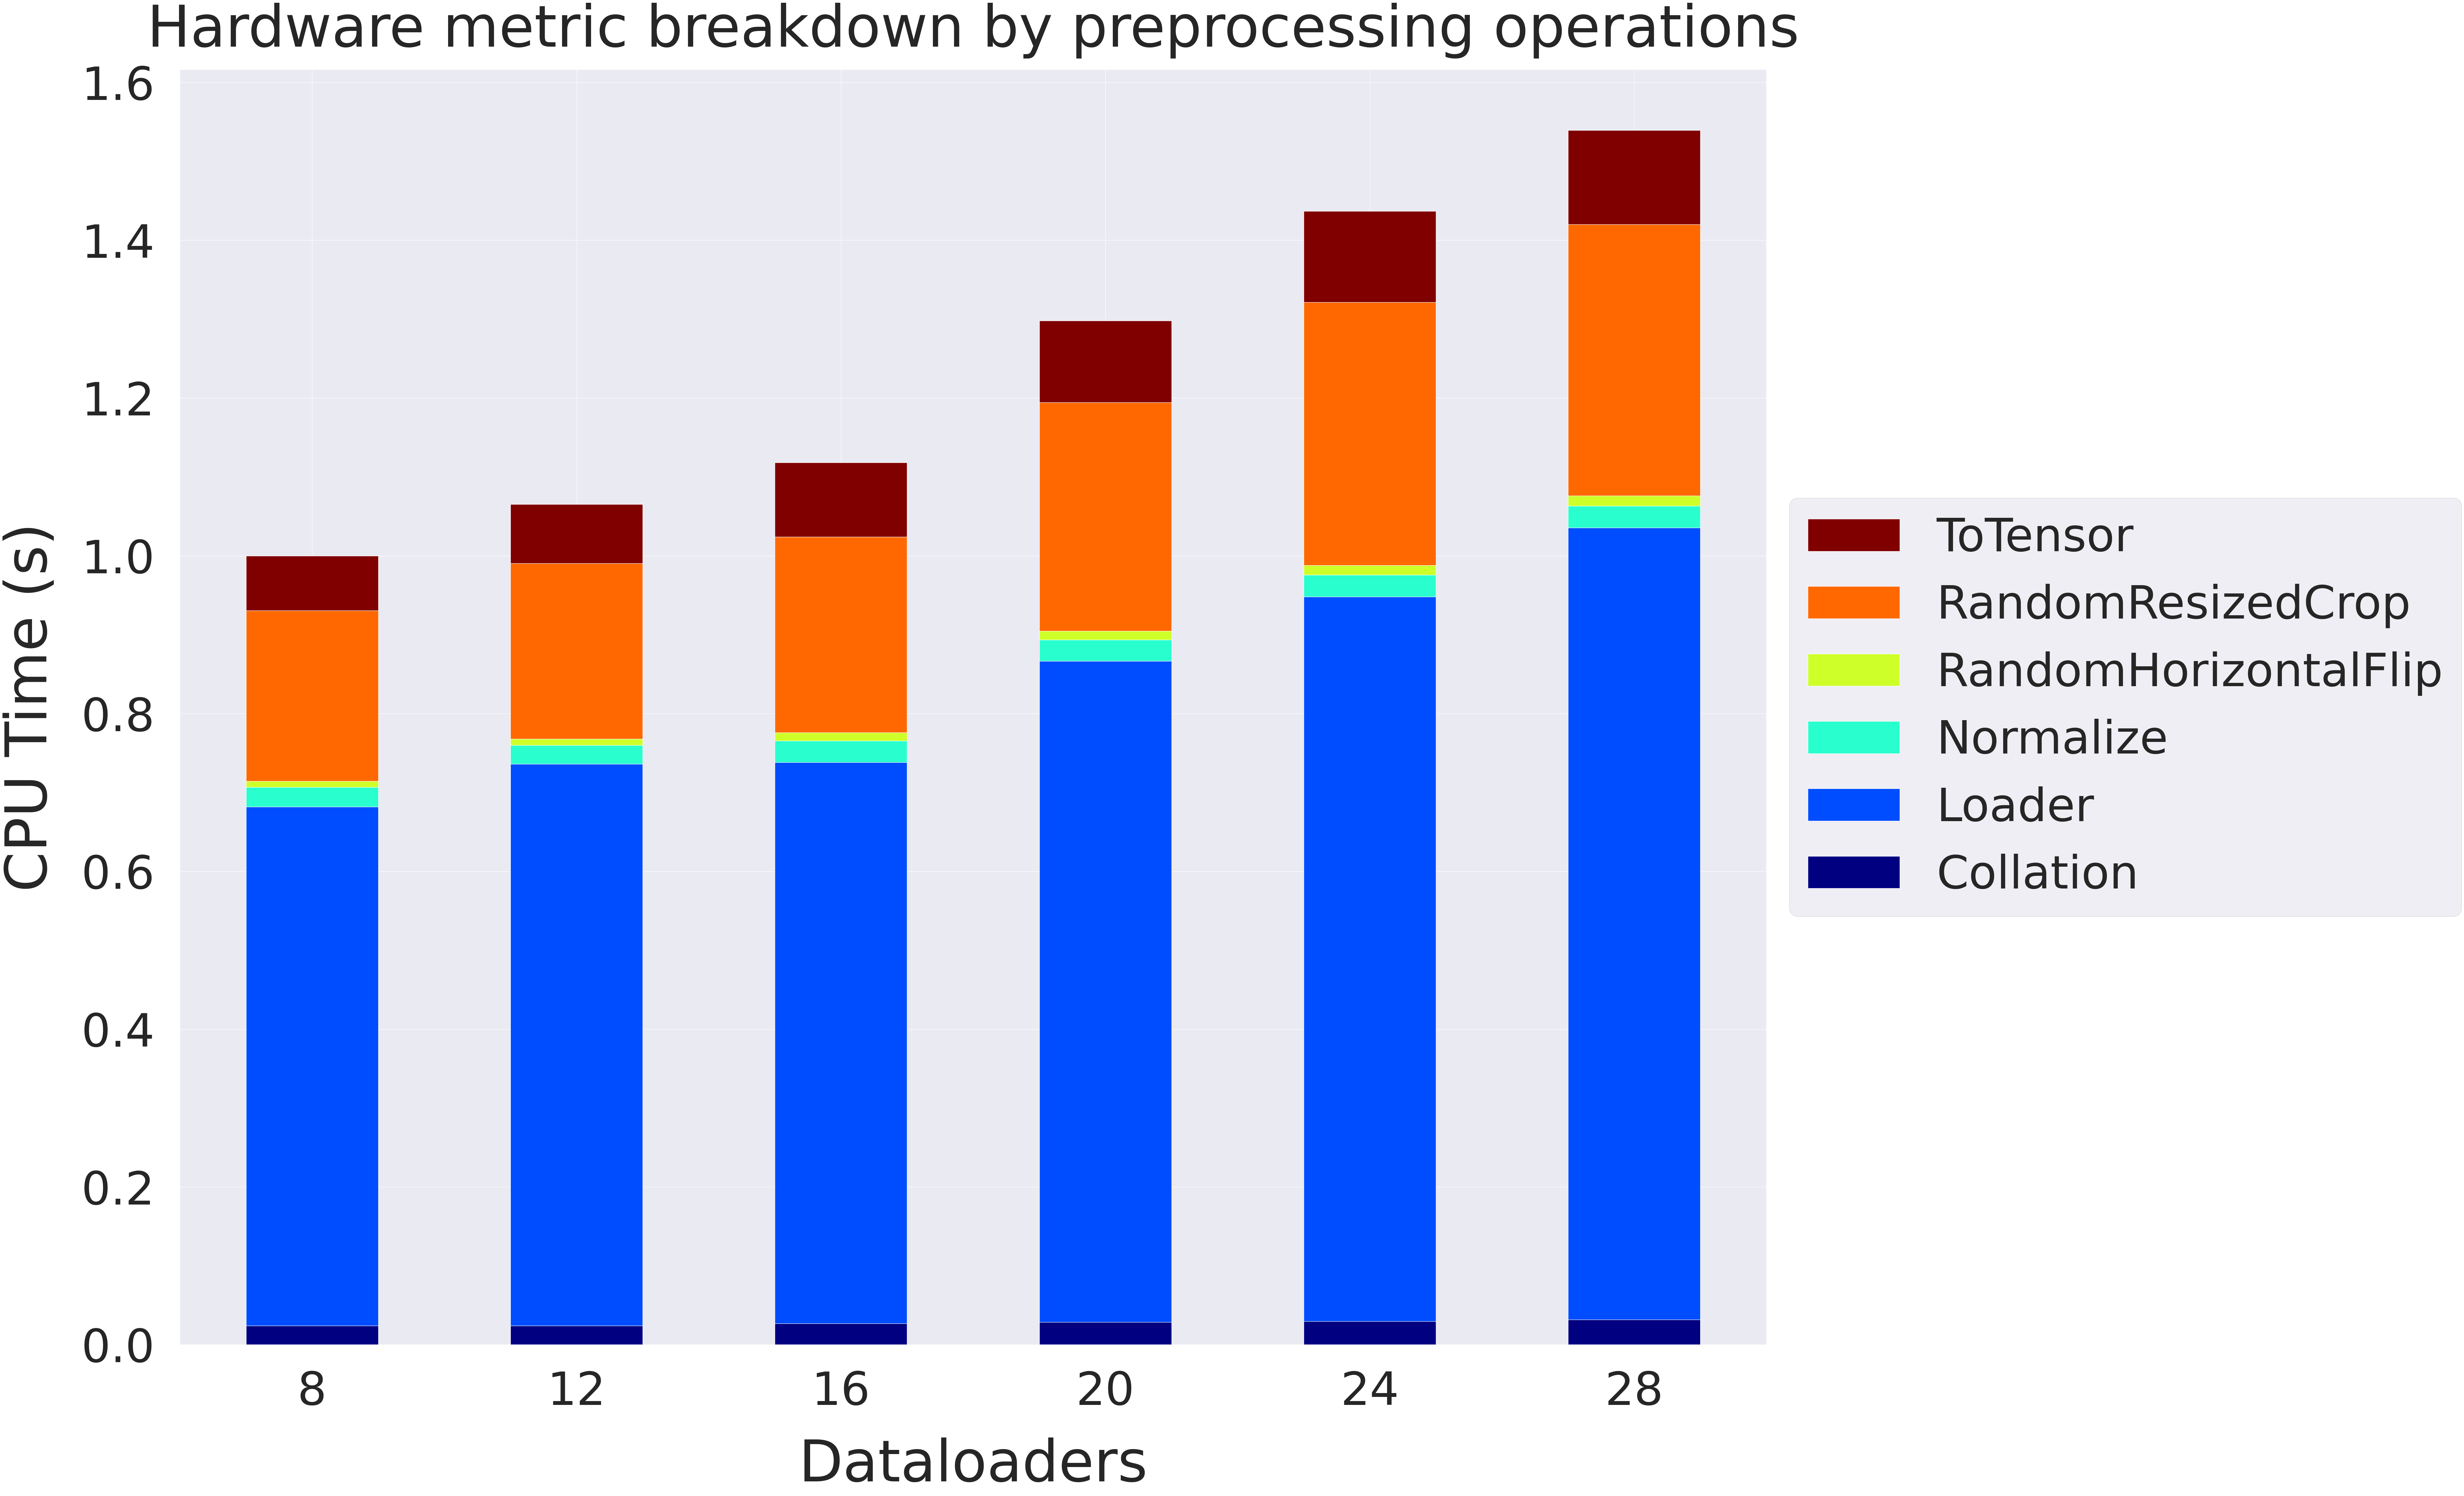

In [419]:
for col in combined_df.columns:
    if col == 'config' or col == 'Function':
        continue
    print(col)
    # pivot table
    df_pivot = combined_df.pivot(index='config', columns='Function', values=col)
    # sort the index using natsort
    df_pivot = df_pivot.reindex(natsort.natsorted(df_pivot.index))
    # find lowest value in entire dataframe and normalize the dataframe by dividing each value by the lowest value suhc that its not 0
    ax = df_pivot.plot(kind='bar', stacked=True, figsize=(100,60),colormap='jet')
    # for c in ax.containers:
    #     ax.bar_label(c, label_type='center')
    # make x axis label horizontal
    plt.xticks(rotation=0)
    # add x axis label
    plt.xlabel('Dataloaders')
    # add y axis label
    plt.ylabel(f"{col}")
    # add title to legend
    plt.title("Hardware metric breakdown by preprocessing operations")    
    # reverse legend order
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.subplots_adjust(right=0.70)
    plt.savefig('/mydata/rbachkaniwala3/code/rajveerb-ml-pipeline-benchmark/junk_mapped' +'/'+col+'.png')
    plt.close()
